In [4]:
# Implement the main EM algorithm for the mixture of Gaussians model
    # Input: data file, number of clusters, number of iterations
    # Output: the final parameters of the model

In [34]:
# Expectation-Maximization algorithm
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
from tqdm import tqdm
from scipy.stats import multivariate_normal

### A) The gaussian 2-dim data on file  2gaussian.txt  has been generated  using a mixture  of  two Gaussians, each  2-dim, with the parameters below. Run the EM algorithm with random initial values to recover the parameters.
mean_1 [3,3]); cov_1 = [[1,0],[0,3]]; n1=2000 points

mean_2 =[7,4]; cov_2 = [[1,0.5],[0.5,1]]; ; n2=4000 points

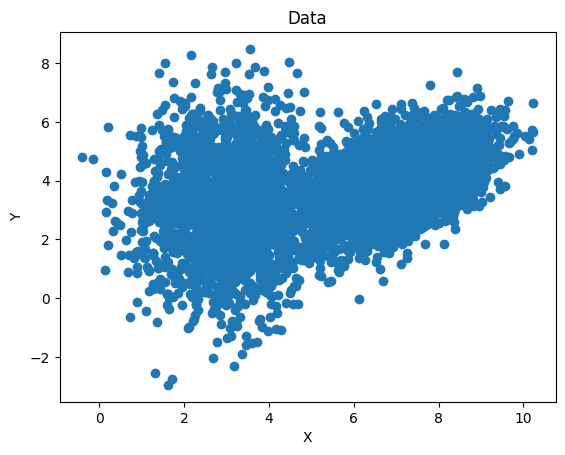

In [6]:
# read input data from 2gaussian.txt

data = np.loadtxt("2gaussian.txt")

# plot the data
plt.scatter(data[:, 0], data[:, 1])
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [9]:
# KMeans: 
    # Initialize K cluster centers
    # Assign each data point to the nearest cluster center
    # Update cluster centers
    # Repeat until convergence (no change in cluster centers)
    # Termination criteria: max iterations, no change in cluster centers, etc.

def kmeans(data, k, similarity, max_iter=10):
    # Randomly initialize cluster centers
    centers = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in tqdm(range(max_iter)):
        # Assign each data point to the nearest cluster center - E-step (best memberships closest to centers)
        clusters = [[] for _ in range(k)]
        for x in data:
            cluster = min(range(k), key=lambda c: similarity(x, centers[c]))
            clusters[cluster].append(x)

        # Update cluster centers - M-step (not changing memberships)
        new_centers = [np.mean(cluster, axis=0) for cluster in clusters]

        # Check for convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers
        
    return centers, clusters


In [10]:
gaussian_kmeans = kmeans(data, 2, lambda x, y: np.linalg.norm(x - y))

  0%|          | 0/10 [00:00<?, ?it/s]

 70%|███████   | 7/10 [00:00<00:00, 18.32it/s]


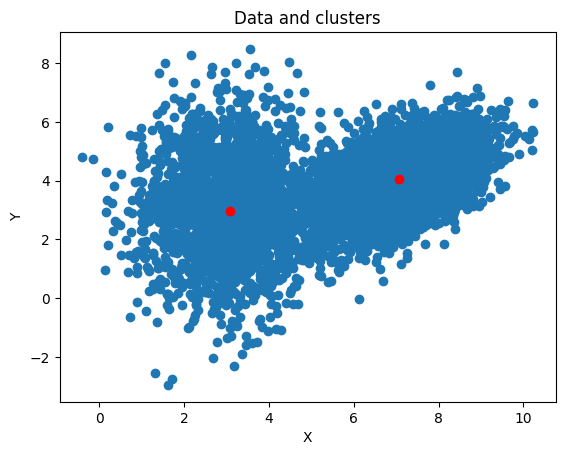

mu [[7.07484902 4.05298153]
 [3.08642083 2.9715792 ]]
pi [0.64716667 0.35283333]


In [13]:
mu = np.array(gaussian_kmeans[0])
pi = np.array([len(cluster) / data.shape[0] for cluster in gaussian_kmeans[1]])
# plot for visualization
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(mu[:, 0], mu[:, 1], c="red")
plt.title("Data and clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
print("mu", mu)
print("pi", pi)

In [20]:
#implement one gaussian:

# Parameters: x, mu, sigma
# Output: probability density of the data point x
# can use scipy.stats.multivariate_normal.pdf

def gaussian(x, mu, sigma):
    return multivariate_normal.pdf(x, mu, sigma)

first_gaussian = gaussian(data, mu[0], np.cov(data.T))
second_gaussian = gaussian(data, mu[1], np.cov(data.T))



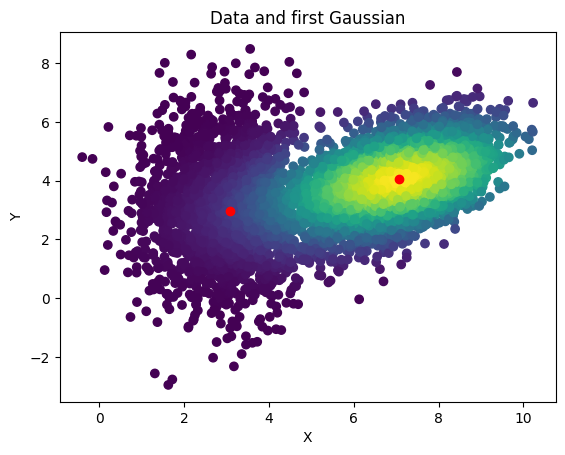

In [21]:
# plot for visualization
plt.scatter(data[:, 0], data[:, 1], c=first_gaussian)
plt.scatter(mu[:, 0], mu[:, 1], c="red")
plt.title("Data and first Gaussian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


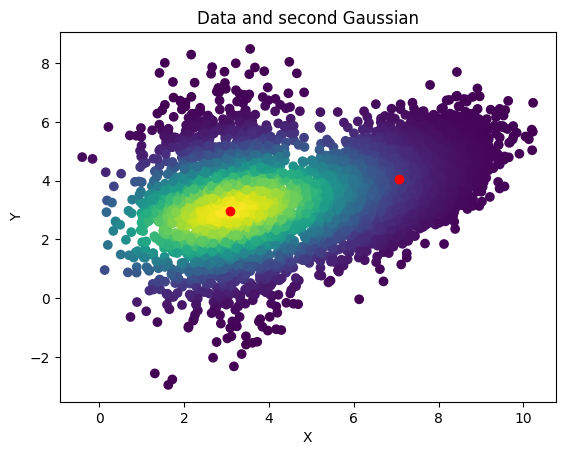

In [22]:
# plot second gaussian
plt.scatter(data[:, 0], data[:, 1], c=second_gaussian)
plt.scatter(mu[:, 0], mu[:, 1], c="red")
plt.title("Data and second Gaussian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
# Implement the EM algorithm for the mixture of Gaussians model
# Parameters: data, number of clusters, number of iterations, sigma (covariance matrix)
# Output: the final parameters of the model

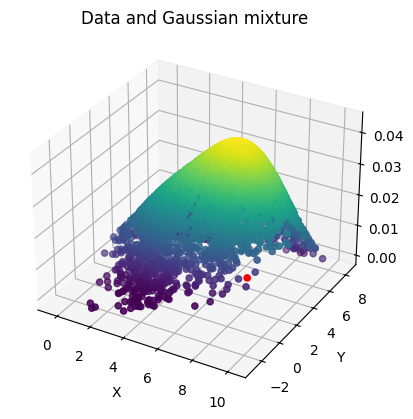

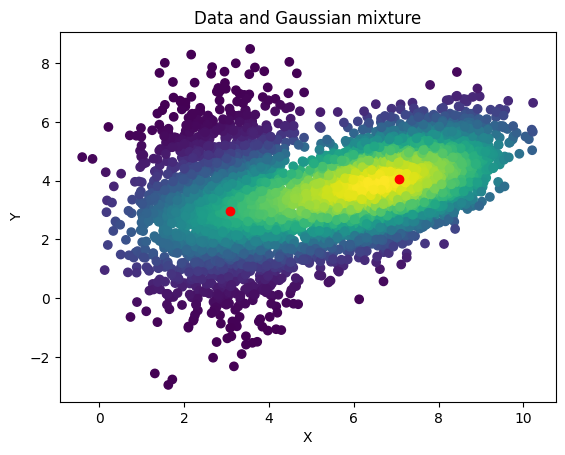

In [32]:
# Mixture function for these 2 Gaussians:
def mixture(data, mu, pi):
    return pi[0] * gaussian(data, mu[0], np.cov(data.T)) + pi[1] * gaussian(data, mu[1], np.cov(data.T))

gaussian_mixture_2 = mixture(data, mu, pi)

# plot in 3d for visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], gaussian_mixture_2, c=gaussian_mixture_2)
ax.scatter(mu[:, 0], mu[:, 1], 0, c="red")
plt.title("Data and Gaussian mixture")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# plot in 2d for visualization
plt.scatter(data[:, 0], data[:, 1], c=gaussian_mixture_2)
plt.scatter(mu[:, 0], mu[:, 1], c="red")
plt.title("Data and Gaussian mixture")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [29]:
new_gaussian_mixture = em(data, 2)

100%|██████████| 10/10 [00:35<00:00,  3.54s/it]


### B) Same problem for 2-dim data on file 3gaussian.txt , generated using a mixture of three Gaussians. Verify your  findings against the true parameters used generate the data below.
mean_1 = [3,3] ; cov_1 = [[1,0],[0,3]]; n1=2000

mean_2 = [7,4] ; cov_2 = [[1,0.5],[0.5,1]] ; n2=3000

mean_3 = [5,7] ; cov_3 = [[1,0.2],[0.2,1]]    ); n3=5000


In [36]:
df_3 = np.loadtxt("3gaussian.txt")

In [37]:
gaussian_kmeans_3 = kmeans(df_3, 3, lambda x, y: np.linalg.norm(x - y))

 90%|█████████ | 9/10 [00:01<00:00,  8.50it/s]


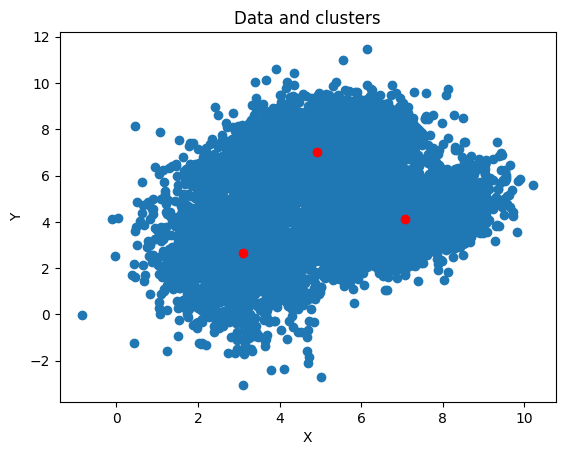

In [39]:
# plot for visualization
plt.scatter(df_3[:, 0], df_3[:, 1])
centers = np.array(gaussian_kmeans_3[0])
plt.scatter(centers[:, 0], centers[:, 1], c="red")
plt.title("Data and clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [40]:
# covariance matrix
cov = np.cov(df_3.T)